A code example showing how to load NuSTAR hk files - livetime and CHU

This might not be the best way of handling time series (??) or time formats (here doing astropytime to datetime to matplotdates....)

In [1]:
from astropy.io import fits
import numpy as np
import astropy.time
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

dirin=''
livefile = 'nu90410111001A_fpm.hk'
chufile= 'nu90410111001_chu123.fits'

In [2]:
# Setup the font used for plotting
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 18

In [3]:
# Load in the livetime file
llist = fits.open(dirin+livefile)
# llist.info()
ldata=llist[1].data
lhdr = llist[1].header

# What are the column names of the livetime file (ldata) ?
print(llist[1].columns.names)

llist.close()

['TIME', 'FRAME24', 'SHLDLO', 'SHLDHI', 'LIVETIME_RAW', 'LIVETIME', 'EVTIME', 'NEV', 'NACCEPT', 'NREJECT', 'NCZT0_A', 'NCZT1_A', 'NCZT2_A', 'NCZT3_A', 'NSHLO_A', 'NSHHI_A', 'NUPTRIG_A', 'NTPTRIG_A', 'NCZT0_R', 'NCZT1_R', 'NCZT2_R', 'NCZT3_R', 'NSHLO_R', 'NSHHI_R', 'NUPTRIG_R', 'NTPTRIG_R', 'NCEV', 'NZERO']


In [4]:
mjdref=astropy.time.Time(lhdr['mjdrefi'],format='mjd')
ltims=astropy.time.Time(mjdref+ldata['time']*u.s,format='mjd')
print(ltims.isot[0:10])

# Convert to format matplotlib can handle
# So going astropytime -> datetime -> matplotlibdates
dates = matplotlib.dates.date2num(ltims.datetime)

# Not that the Livetime fraction and in seconds is the same thing 
# here under 'livetime' as the time binning is 1sec
# plt.plot(ldata['livetime'])
print(ldata['livetime'].mean())

['2018-09-28T18:47:48.000' '2018-09-28T18:47:49.000'
 '2018-09-28T18:47:50.000' '2018-09-28T18:47:51.000'
 '2018-09-28T18:47:52.000' '2018-09-28T18:47:53.000'
 '2018-09-28T18:47:54.000' '2018-09-28T18:47:55.000'
 '2018-09-28T18:47:56.000' '2018-09-28T18:47:57.000']
0.6917553806919711


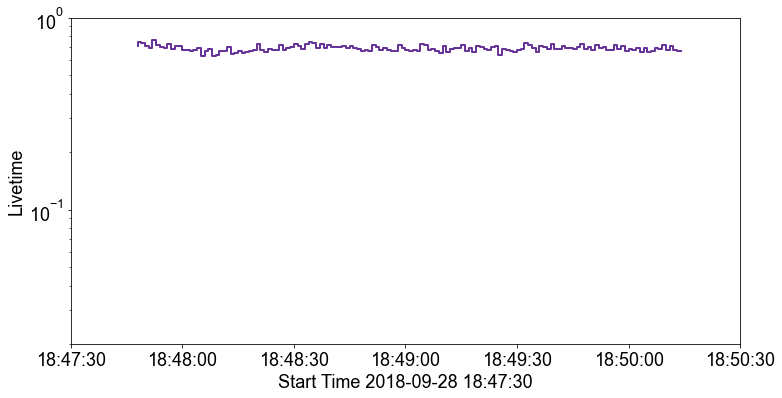

In [5]:
fig=plt.figure(figsize=(12, 6))
axes = plt.gca()
#turn the legend off
axes.legend_=None

#Plot the data
#solid line with markers off
axes.plot_date(dates, ldata['livetime'], color='rebeccapurple',
               linestyle='solid',linewidth=2,marker="",drawstyle='steps')

# #So timerange matches data exactly
mint='2018-09-28 18:47:30'
maxt='2018-09-28 18:50:30'
axes.set_xlabel("Start Time "+mint)
min_date=matplotlib.dates.datestr2num(mint)
max_date=matplotlib.dates.datestr2num(maxt)
axes.set_xlim([min_date,max_date])
# axes.set_xlim([min(dates),max(dates)])
axes.set_ylabel('Livetime')
axes.set_ylim([2e-2,1.])
axes.set_yscale('log')

#Specifies the format of the time date labels
formatter = matplotlib.dates.DateFormatter('%H:%M:%S')
axes.xaxis.set_major_formatter(formatter)

plt.show()

In [6]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

In [7]:
# Load in the CHU file
clist = fits.open(dirin+chufile)
# clist.info()
cdata1=clist[1].data
cdata2=clist[2].data
cdata3=clist[3].data
chdr = clist[1].header
# What are the column names of the livetime file (ldata) ?
print(clist[1].columns.names)
clist.close()

mjdref=astropy.time.Time(chdr['mjdrefi'],format='mjd')
ctims=astropy.time.Time(mjdref+cdata3['time']*u.s,format='mjd')
print(ltims.isot[0:10])

# Convert to format matplotlib can handle
# So going astropytime -> datetime -> matplotlibdates
cdates = matplotlib.dates.date2num(ctims.datetime)


['TIME', 'CHUQ', 'SEQUENCE', 'CORR', 'CHUID', 'HIRATE', 'BBO', 'TIMEREF', 'VALID', 'RESIDUAL', 'LOCKS', 'OBJECTS', 'STARSFAIL', 'AGCFLOOR', 'AGCCEIL']
['2018-09-28T18:47:48.000' '2018-09-28T18:47:49.000'
 '2018-09-28T18:47:50.000' '2018-09-28T18:47:51.000'
 '2018-09-28T18:47:52.000' '2018-09-28T18:47:53.000'
 '2018-09-28T18:47:54.000' '2018-09-28T18:47:55.000'
 '2018-09-28T18:47:56.000' '2018-09-28T18:47:57.000']


In [8]:
# I think this is correct to work out the CHU mask
#  Based on the IDL code ../idl/load_nschu.pro
# Just assinging 1 if in CHU1, 4 if in CHU2, 9 if in CHU3
# Also a value of 5=> CHU12, 10 => CHU13, 14 => CHU123 etc.....
maxres=20

c1mask=np.all([[cdata1['valid'] == 1],[cdata1['residual'] < maxres],\
              [cdata1['starsfail'] < cdata1['objects']],[cdata1['chuq'][:,3] != 1]],axis=0)
# These give True or Flase back so multiplying by number gives number or 0
c1mask=c1mask[0]*1

c2mask=np.all([[cdata2['valid'] == 1],[cdata2['residual'] < maxres],\
              [cdata2['starsfail'] < cdata2['objects']],[cdata2['chuq'][:,3] != 1]],axis=0)
c2mask=(c2mask[0]*4)

c3mask=np.all([[cdata3['valid'] == 1],[cdata3['residual'] < maxres],\
              [cdata3['starsfail'] < cdata3['objects']],[cdata3['chuq'][:,3] != 1]],axis=0)
c3mask=(c3mask[0]*9)

mask=c1mask+c2mask+c3mask
# print(mask)

# Tweak the mask labelling to make plotting easier
# Maybe not the best way of doing this....
newmask=np.zeros(len(mask))
newmask[np.where(mask ==1)]=1
newmask[np.where(mask ==4)]=2
newmask[np.where(mask ==5)]=3
newmask[np.where(mask ==9)]=4
newmask[np.where(mask ==10)]=5
newmask[np.where(mask ==13)]=6
newmask[np.where(mask ==14)]=7

# print(newmask)


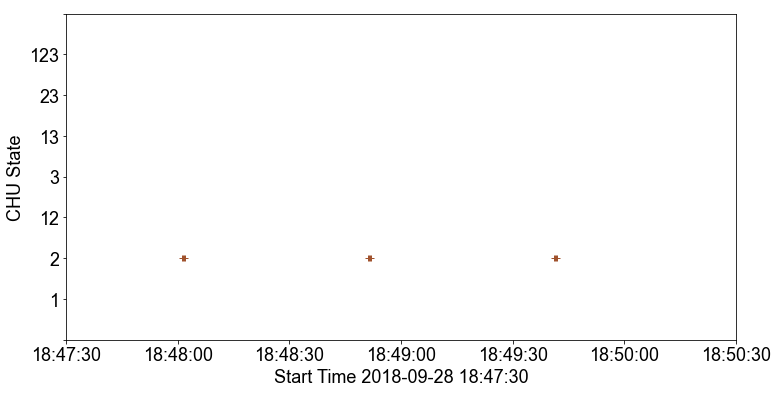

In [9]:
fig=plt.figure(figsize=(12, 6))
axes = plt.gca()
#turn the legend off
axes.legend_=None

#Plot the data
#solid line with markers off
axes.plot_date(cdates, newmask, color='sienna',linewidth=2,marker='+')

# #So timerange matches data exactly
mint='2018-09-28 18:47:30'
maxt='2018-09-28 18:50:30'
axes.set_xlabel("Start Time "+mint)
min_date=matplotlib.dates.datestr2num(mint)
max_date=matplotlib.dates.datestr2num(maxt)
axes.set_xlim([min_date,max_date])
# axes.set_xlim([min(dates),max(dates)])
axes.set_yticklabels([' ','1','2','12','3','13','23','123',' '])
axes.set_ylabel('CHU State')
axes.set_ylim([0,8])

#Specifies the format of the time date labels
formatter = matplotlib.dates.DateFormatter('%H:%M:%S')
axes.xaxis.set_major_formatter(formatter)

plt.show()